In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
import string

c:\users\niubò\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\niubò\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\niubò\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\niubò\appd

#### Standarize data from different languages

In [ ]:
### spanish data

In [492]:
def standarize_spanish_names(file,gender):
    df = pd.read_csv('data/{}.csv'.format(file))
    df.dropna(inplace=True)
    df['name'] = df.apply(lambda x: x['name'].lower().replace(' ',''), axis=1)
    df['frequency'] = df['frequency']/df['frequency'].max() 
    upper_quartil = np.percentile(df['frequency'], 75)
    df = df[df['frequency']>=upper_quartil]
    df.reset_index()[['name']].to_feather('data/standarized/spanish_{}_names'.format(gender))

In [493]:
def standarize_englsih_names(file):
    df = pd.read_csv('data/{}.csv'.format(file))
    df.dropna(inplace=True)
    def sub_function(df, gen):
        df1 = df[df['sex'] == gen].copy()
        df1['name'] = df1.apply(lambda x: x['name'].lower().replace(' ',''), axis=1)
        upper_quartil = np.percentile(df['percent'], 75)
        df1 = df1[df1['percent']>=upper_quartil]
        df1.reset_index()[['name']].to_feather('data/standarized/english_{}_names'.format('female' if gen == 'girl' else 'male'))
    for gender in ['girl', 'boy']:
        sub_function(df, gender) 

##### Standarized data generation 

In [299]:
standarize_spanish_names('spanish_female_names','female')
standarize_spanish_names('spanish_male_names','male')
standarize_englsih_names('english_names')

In [494]:
df = pd.read_feather('data/standarized/spanish_female_names')

In [495]:
df.head()

,name
0,mariacarmen
1,maria
2,carmen
3,josefa
4,isabel


In [496]:
names = np.unique(df.name)

In [497]:
names

array(['abelina', 'abenchara', 'abida', ..., 'zunilda', 'zuriñe',
       'zuzana'], dtype=object)

In [498]:
texts = []
labels = []
for name in names:
    for l in range(len(name)):
        if l>0:
            texts.append(list(name[:l]))
            labels.append(name[l])

In [499]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'a': 1, 'i': 2, 'r': 3, 'e': 4, 'm': 5, 'n': 6, 'l': 7, 'c': 8, 's': 9, 'o': 10, 't': 11, 'd': 12, 'u': 13, 'g': 14, 'b': 15, 'j': 16, 'v': 17, 'p': 18, 'f': 19, 'h': 20, 'y': 21, 'z': 22, 'k': 23, 'x': 24, 'q': 25, 'w': 26, 'ñ': 27, 'ç': 28}
29


In [500]:
input_sequences = []
for line in texts:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

In [501]:
input_sequences

[[1],
 [1, 15],
 [1, 15, 4],
 [1, 15, 4, 7],
 [1, 15, 4, 7, 2],
 [1, 15, 4, 7, 2, 6],
 [1],
 [1, 15],
 [1, 15, 4],
 [1, 15, 4, 6],
 [1, 15, 4, 6, 8],
 [1, 15, 4, 6, 8, 20],
 [1, 15, 4, 6, 8, 20, 1],
 [1, 15, 4, 6, 8, 20, 1, 3],
 [1],
 [1, 15],
 [1, 15, 2],
 [1, 15, 2, 12],
 [1],
 [1, 15],
 [1, 15, 2],
 [1, 15, 2, 14],
 [1, 15, 2, 14, 1],
 [1, 15, 2, 14, 1, 2],
 [1],
 [1, 15],
 [1, 15, 2],
 [1, 15, 2, 7],
 [1, 15, 2, 7, 2],
 [1],
 [1, 15],
 [1, 15, 2],
 [1],
 [1, 15],
 [1, 15, 3],
 [1, 15, 3, 1],
 [1],
 [1, 15],
 [1, 15, 3],
 [1, 15, 3, 2],
 [1],
 [1, 15],
 [1, 15, 13],
 [1, 15, 13, 6],
 [1, 15, 13, 6, 12],
 [1, 15, 13, 6, 12, 2],
 [1],
 [1, 8],
 [1, 8, 1],
 [1, 8, 1, 8],
 [1, 8, 1, 8, 2],
 [1],
 [1, 8],
 [1, 8, 10],
 [1, 8, 10, 3],
 [1, 8, 10, 3, 1],
 [1, 8, 10, 3, 1, 2],
 [1, 8, 10, 3, 1, 2, 12],
 [1],
 [1, 12],
 [1],
 [1, 12],
 [1, 12, 1],
 [1, 12, 1, 2],
 [1],
 [1, 12],
 [1, 12, 1],
 [1, 12, 1, 7],
 [1, 12, 1, 7, 14],
 [1, 12, 1, 7, 14, 2],
 [1, 12, 1, 7, 14, 2, 9],
 [1],
 [1, 12],


In [502]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [503]:
token_label = tokenizer.texts_to_sequences(labels)

In [504]:
ys = tf.keras.utils.to_categorical(token_label, num_classes=total_words)

In [505]:
input_sequences

array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1, 15],
       [ 0,  0,  0, ...,  1, 15,  4],
       ...,
       [ 0,  0,  0, ..., 22, 13, 22],
       [ 0,  0,  0, ..., 13, 22,  1],
       [ 0,  0,  0, ..., 22,  1,  6]])

In [506]:
input_sequences.shape

(48529, 24)

In [507]:
ys.shape

(48529, 29)

In [508]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(input_sequences, ys, epochs=5, verbose=1)
#print model.summary()
print(model)

Epoch 1/5
48529/48529 [==============================] - 46s 943us/sample - loss: 1.7295 - accuracy: 0.4930- los
Epoch 2/5
48529/48529 [==============================] - 44s 916us/sample - loss: 1.4886 - accuracy: 0.5590
Epoch 3/5
48529/48529 [==============================] - 45s 932us/sample - loss: 1.4444 - accuracy: 0.5687
Epoch 4/5
48529/48529 [==============================] - 45s 928us/sample - loss: 1.4132 - accuracy: 0.5781
Epoch 5/5
48529/48529 [==============================] - 54s 1ms/sample - loss: 1.4168 - accuracy: 0.5756


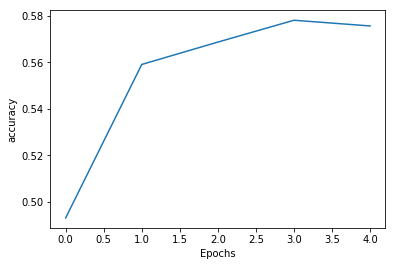

In [513]:
def plot_epochs_accuracy(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

    
plot_epochs_accuracy(history, 'accuracy')

In [514]:
tokenizer.word_index.items()

dict_items([('a', 1), ('i', 2), ('r', 3), ('e', 4), ('m', 5), ('n', 6), ('l', 7), ('c', 8), ('s', 9), ('o', 10), ('t', 11), ('d', 12), ('u', 13), ('g', 14), ('b', 15), ('j', 16), ('v', 17), ('p', 18), ('f', 19), ('h', 20), ('y', 21), ('z', 22), ('k', 23), ('x', 24), ('q', 25), ('w', 26), ('ñ', 27), ('ç', 28)])

In [573]:
def get_deep_name(seed=None, length=None):
    token = []
    if seed is None:
        seed = string.ascii_lowercase[random.randint(0, len(string.ascii_lowercase)-1)]
        print('Randomly choosen {} as a first letter.\n'.format(seed.title()))
    if length is None:
        length = random.randint(4,12)
        print('Randomly choosen {} as word length.\n\n'.format(length))
    for l in range(length - 1):
        token = tokenizer.texts_to_sequences([list(seed)])
        token = np.array(pad_sequences(token, maxlen=max_sequence_len, padding='pre'))
        # we can get the best choice from the next line
        #predicted = model.predict_classes(token)[0]
        # we prefer to give som randomness to the process in order to avoid existing names
        predictions = model.predict(token).argsort()[0][::-1][:3]
        choice = random.choices(range(3), weights=(40, 30, 10))
        predicted = predictions[choice]
        for key, value in tokenizer.word_index.items():
            if value == predicted:
                predicted = key
        seed = seed + predicted
    
    return seed
    


In [592]:
print('Yout DeepName is \033[1m' + get_deep_name().title() + '\033[0m. What a cool name!!!')

Randomly choosen B as a first letter.

Randomly choosen 10 as word length.


Yout DeepName is Bearyamarg. What a cool name!!!
